# 1. Data Preparation

## 1.1 Load Data

In [30]:
import pandas as pd
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
path = '/Users/pliu/Downloads/mnist/'
train, test = pd.read_csv(path+'train.csv'), pd.read_csv(path+'test.csv') 
train.shape #(42000, 785)
test.shape #(28000, 784)

(42000, 785)

In [7]:
Y_train, X_train = train['label'], train.drop(['label'], axis=1)

In [10]:
# free some space
del train

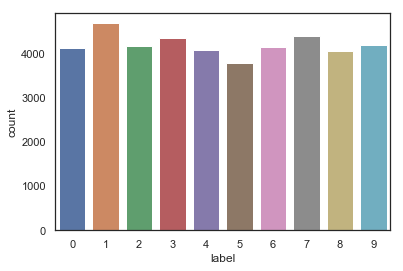

In [13]:
# check distribution of target var
sns.countplot(Y_train)
# findings: similar counts for the 10 digits

## 1.2 Missing Value

In [16]:
# Missing value statistics
def missing_data(df=X_train):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data().head(20) # no missing values
missing_data(test).head(20) # no missing values

,Total,Percent
pixel783,0,0.0
pixel268,0,0.0
pixel266,0,0.0
pixel265,0,0.0
pixel264,0,0.0
pixel263,0,0.0
pixel262,0,0.0
pixel261,0,0.0
pixel260,0,0.0
pixel259,0,0.0


## 1.3 Normalization

In [19]:
# perform a grayscale normalization
# reason: 1. reduce the effect of scaling 2. accelerate converge
# normalize the data
X_train = X_train / 255.0
test = test / 255.0

## 1.4 Reshape

In [20]:
# reshape image in 3 Dimensions (height = 28px, width = 28px, canal = 1)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [21]:
# X_train before reshaping is a Pandas.DataFrame which has 42k rows and 784 (28*28) features
X_train.shape # 42000 observations in 3D format: width 28, height 28, canal 1

(42000, 28, 28, 1)

## 1.5 Label Encoding

In [24]:
# label vector from 1-D to hot-encoding
Y_train = to_categorical(Y_train, num_classes=10) #numpy.ndarray

In [26]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 1.6 Split dataset

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

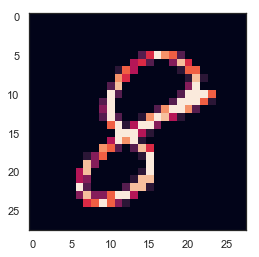

In [31]:
# have a look at the data
g = plt.imshow(X_train[0][:,:,0])

# 2. CNN

## 2.1 Define the model

In [ ]:
# use Keras Sequential API - add one layer at a time, starting from the input
# 1st layer: Conv2D - convolutional layer
# set 32 filters for the two firsts conv2D layers
# set 64 filters for the two lasts ones
# each filter transforms a part of the image using the kernel filter
# filter can be seen as a transformation of the image

# 2nd layer: pooling layer (MaxPool2D)
# acts as a down-sampling filter
# used to reduce computational cost and overfitting
# have to choose the pooling size (the area size pooled each time)
# the higher the pooling dimension, the more important the downsampling is

# dropout: the regularization method - setting a proportion of nodes' weights to zero
# improves generalization and reduces overfitting

# relu: the activation func max(0, x) 
# add non-linearity to the network

# Flatten layer - map the final features into a one single 1D vector
# so as to mke use of fully connected layers after some convolutional / maxpool layers
# it combines all the found local features of the previous convolutional layers

# Dense in the last layer
# implement two fully-connected (Dense) layers which is just ANN classifier
# (Dense(10, activation='softmax')) outputs the probability of each class

# CNN architechture: 
#    Input -> [[Conv2D -> relu] * 2 -> MaxPool2D -> Dropout] * 2 -> Flatten -> Dense -> Dropout -> Output

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [34]:
# use Keras Sequential API, just to add one layer at a time
model = Sequential()

# add the first layer - Conv2D for two times
# Conv2D is like a set of learnable filters

# what is kernel in Conv2D ??
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))

# add the 2nd layer in CNN: the pooling layer
# MaxPool2D - a downsampling filter
# reduce computational cost and overfitting

model.add(MaxPool2D(pool_size=(2,2)))

# add regularization, improve generalization and reduces overfitting
model.add(Dropout(0.25))

# add Flatten
model.add(Flatten())

# add Dense() fully-connected layers
model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))